In [76]:
from sympy import symbols, Eq, Function,UnevaluatedExpr, Mul, Rational, sqrt, Pow
from sympy import Piecewise, nan, N, And, log
import matplotlib.pyplot as plt

ue=UnevaluatedExpr

c_dir = symbols('c_dir')#1.0
c_season = symbols('c_season')#1.0
v_b0 = symbols('v_b0')#27.0  # km/h
p = symbols('p')#0.01
K = symbols('K')#0.2
n = symbols('n')#0.5
rho = symbols('rho')#1.25  # kg/m3
z=symbols('z')
z_max = symbols('z_max')#200.0  # m
z_0 = symbols('z_0')#0.003  # m
z_min = symbols('z_min')#1.0  # m
z_0II = symbols('z_0II')#0.005  # m
k_I = symbols('k_I')#1.00
A_ref = symbols('A_ref')#800  # m2
c_d = symbols('c_d')#1.00
c_f = symbols('c_f')#1.55
c_0 = symbols('c_0')#1.00
v_b=symbols('v_b')
k_r=symbols('k_r')
c_r=symbols('c_r',cls=Function)(z)
z_e, c_pe = symbols('z_e c_pe')
z_i, c_p_i = symbols('z_i c_p_i')
c_d, c_s,c_f, A_ref = symbols('c_d c_s c_f A_ref')
A_fr, c_fr=symbols('A_fr c_fr')
F_fr=symbols('F_fr', cls=Function)(z_e) 
c_s, z_s, B, R, k_p=symbols('c_s z_s B R k_p')
c_d=symbols('c_d ')
c_sd=symbols('c_sd ')
c_prob=symbols('c_prob')
v_m=symbols('v_m',cls=Function)(z)
q_b=symbols('q_b')
sigma_v=symbols('sigma_v')
c_e=symbols('c_e', cls=Function)(z)
I_v=symbols('I_v',cls=Function)(z)
q_p=symbols('q_p', cls=Function)(z)



c_dir=UnevaluatedExpr(c_dir)
c_season=UnevaluatedExpr(c_season)
v_b0=UnevaluatedExpr(v_b0)
c_prob=UnevaluatedExpr(c_prob)
K=ue(K)
p=ue(p)
n=ue(n)
z_0=UnevaluatedExpr(z_0)
z_0II=UnevaluatedExpr(z_0II)
rho=UnevaluatedExpr(rho)
v_b=UnevaluatedExpr(v_b)
k_r=UnevaluatedExpr(k_r)
k_I=UnevaluatedExpr(k_I)
z=UnevaluatedExpr(z)
z_min=UnevaluatedExpr(z_min)
z_max=UnevaluatedExpr(z_max)
z_0=UnevaluatedExpr(z_0)
k_r=UnevaluatedExpr(k_r)
z=UnevaluatedExpr(z)
c_0=UnevaluatedExpr(c_0)
v_b=UnevaluatedExpr(v_b)
sigma_v=UnevaluatedExpr(sigma_v)
I_v=UnevaluatedExpr(I_v)
rho=UnevaluatedExpr(rho)
v_m=UnevaluatedExpr(v_m)
q_p=UnevaluatedExpr(q_p)
q_b=UnevaluatedExpr(q_b)

#c_r=UnevaluatedExpr(c_r)



def v_b_func(**db):
    db = {eval(key): value for key, value in db.items()}
    expr=c_dir * c_season * v_b0
    expr=expr.subs(db)
    return Eq(v_b, expr, evaluate=False)


def c_prob_func(**db):
    db = {eval(key): value for key, value in db.items()}
    expr=((1 - Mul(K , log(-log(1 - p)),evaluate=False))/ (1 - Mul(K , log(-log(0.98,evaluate=False),evaluate=False),evaluate=False))) **n
    expr=expr.subs(db)
    return Eq(c_prob,expr, evaluate=False)


def k_r_func(**db):
    db = {eval(key): value for key, value in db.items()}
    expr = 0.19 * (z_0 / z_0II) ** 0.07
    expr=expr.subs(db)
    return Eq(k_r,expr,evaluate=False)


def q_b_func(**db):
    db = {eval(key): value for key, value in db.items()}
    expr= 0.5 * rho * v_b ** 2  # Fixed operator and added 0.5
    expr=expr.subs(db)
    return Eq(q_b, expr, evaluate=False)

# sigma_v


def sigma_v_func(**db):
    db = {eval(key): value for key, value in db.items()}
    expr = k_r * v_b * k_I
    expr=expr.subs(db)
    return Eq(sigma_v, expr, evaluate=False)


def c_r_func(**db):
    db = {eval(key): value for key, value in db.items()}
    condlist = [And(z >= z_min,z <= z_max), z <= z_min]
    funclist = [Mul(k_r, log(N(z / z_0,2), evaluate=False),evaluate=False), Mul(k_r, log(z_min / z_0, evaluate=False),evaluate=False)]
    expr = Piecewise(*zip(funclist,condlist))
    expr=expr.subs(db)
    return Eq(c_r, expr, evaluate=False)


def v_m_func(**db):
    db = {eval(key): value for key, value in db.items()}
    expr = c_r * c_0 * v_b
    # Apply eval() to all keys
    expr=expr.subs(db)
    return Eq(v_m, expr, evaluate=False)



def I_v_func(**db):
    db = {eval(key): value for key, value in db.items()}
    condlist = [And(z >= z_min,z <= z_max), z <= z_min]
    funclist = [sigma_v / v_m,  sigma_v / v_m.subs(z, z_min)]
    #funclist = [k_I/(c_0*log(z/z_0)),k_I/(c_0*log(z_min/z_0)) ]
    expr = Piecewise(*zip(funclist, condlist))
    expr=expr.subs(db)
    return Eq(I_v, expr, evaluate=False)



def q_p_func(**db):
    db = {eval(key): value for key, value in db.items()}
    expr = (1 + 7 * I_v) * 0.5 * rho * v_m ** 2  # Fixed operator and added 0.5
    expr=expr.subs(db)
    return Eq(q_p, expr, evaluate=False)


def c_e_func(**db):
    db = {eval(key): value for key, value in db.items()}
    expr = q_p / q_b
    expr=expr.subs(db)
    return Eq(c_e, expr,evaluate=False)

db={}
db={'v_b0':27,'c_season':1,'c_0':1,'c_dir':1,'K':0.2,'n':0.5,'p':0.7,'z_0II':0.05,'z_max':200,
   'z_0':0.05,'z_min':2}
#db={}

In [77]:
display(v_b_func())
display(v_b_func(**db))
display(v_b_func(**db).doit())
db['v_b']=v_b_func(**db).doit().rhs
display(db)

Eq(v_b, c_dir*c_season*v_b0)

Eq(v_b, 27)

Eq(v_b, 27)

{'v_b0': 27,
 'c_season': 1,
 'c_0': 1,
 'c_dir': 1,
 'K': 0.2,
 'n': 0.5,
 'p': 0.7,
 'z_0II': 0.05,
 'z_max': 200,
 'z_0': 0.05,
 'z_min': 2,
 'v_b': 27}

In [78]:
display(c_prob_func())
display(c_prob_func(**db))
display(c_prob_func(**db).doit())
db['c_prob']=c_prob_func(**db).doit().rhs
display(db)

Eq(c_prob, ((1 - K*log(-log(1 - p)))*(1 - K*log(-log(0.98)))**(-1))**n)

Eq(c_prob, 0.981261763357529/(1 - 0.2*log(-log(0.98)))**0.5)

Eq(c_prob, 0.735406695578229)

{'v_b0': 27,
 'c_season': 1,
 'c_0': 1,
 'c_dir': 1,
 'K': 0.2,
 'n': 0.5,
 'p': 0.7,
 'z_0II': 0.05,
 'z_max': 200,
 'z_0': 0.05,
 'z_min': 2,
 'v_b': 27,
 'c_prob': 0.735406695578229}

In [79]:
display(k_r_func())
display(k_r_func(**db))
display(k_r_func(**db).doit())
db['k_r']=k_r_func(**db).doit().rhs
#display(db)

Eq(k_r, 0.19*(z_0*z_0II**(-1))**0.07)

Eq(k_r, 0.19)

Eq(k_r, 0.19)

In [80]:
display(sigma_v_func())
display(sigma_v_func(**db))
display(sigma_v_func(**db).doit())
db['sigma_v']=sigma_v_func(**db).doit().rhs
display(db)

Eq(sigma_v, k_r*v_b*k_I)

Eq(sigma_v, 5.13*k_I)

Eq(sigma_v, 5.13*k_I)

{'v_b0': 27,
 'c_season': 1,
 'c_0': 1,
 'c_dir': 1,
 'K': 0.2,
 'n': 0.5,
 'p': 0.7,
 'z_0II': 0.05,
 'z_max': 200,
 'z_0': 0.05,
 'z_min': 2,
 'v_b': 27,
 'c_prob': 0.735406695578229,
 'k_r': 0.190000000000000,
 'sigma_v': 5.13*k_I}

In [81]:
display(c_r_func())
display(c_r_func(**db))
display(c_r_func(**db).doit())
db['c_r']=c_r_func(**db).doit().rhs
display(db)

Eq(c_r(z), Piecewise((k_r*log(z*z_0**(-1)), (z_max >= z) & (z_min <= z)), (k_r*log(z_min*z_0**(-1)), z_min >= z)))

Eq(c_r(z), Piecewise((0.19*log(20.0*z), (z >= 2) & (z <= 200)), (0.700887096281648, z <= 2)))

Eq(c_r(z), Piecewise((0.19*log(20.0*z), (z >= 2) & (z <= 200)), (0.700887096281648, z <= 2)))

{'v_b0': 27,
 'c_season': 1,
 'c_0': 1,
 'c_dir': 1,
 'K': 0.2,
 'n': 0.5,
 'p': 0.7,
 'z_0II': 0.05,
 'z_max': 200,
 'z_0': 0.05,
 'z_min': 2,
 'v_b': 27,
 'c_prob': 0.735406695578229,
 'k_r': 0.190000000000000,
 'sigma_v': 5.13*k_I,
 'c_r': Piecewise((0.19*log(20.0*z), (z >= 2) & (z <= 200)), (0.700887096281648, z <= 2))}

In [82]:
display(v_m_func())
display(v_m_func(**db))
display(v_m_func(**db).doit())
db['v_m']=v_m_func(**db).doit().rhs
display(db)

Eq(v_m(z), c_r(z)*c_0*v_b)

Eq(v_m(z), 27*Piecewise((0.19*log(20.0*z), (z >= 2) & (z <= 200)), (0.700887096281648, z <= 2)))

Eq(v_m(z), 27*Piecewise((0.19*log(20.0*z), (z >= 2) & (z <= 200)), (0.700887096281648, z <= 2)))

{'v_b0': 27,
 'c_season': 1,
 'c_0': 1,
 'c_dir': 1,
 'K': 0.2,
 'n': 0.5,
 'p': 0.7,
 'z_0II': 0.05,
 'z_max': 200,
 'z_0': 0.05,
 'z_min': 2,
 'v_b': 27,
 'c_prob': 0.735406695578229,
 'k_r': 0.190000000000000,
 'sigma_v': 5.13*k_I,
 'c_r': Piecewise((0.19*log(20.0*z), (z >= 2) & (z <= 200)), (0.700887096281648, z <= 2)),
 'v_m': 27*Piecewise((0.19*log(20.0*z), (z >= 2) & (z <= 200)), (0.700887096281648, z <= 2))}

In [83]:
db['v_m'].subs('z',5)

23.6245230541189

In [84]:
v_m_func().subs(c_r,5)

Eq(v_m(z), 5*c_0*v_b)

In [85]:
z_values = range(1, 10)
results = [db['v_m'].subs('z', value) for value in z_values]
results

[18.9239515996045,
 18.9239515996045,
 21.0039876041994,
 22.4797966358770,
 23.6245230541189,
 24.5598326404719,
 25.3506256279857,
 26.0356416721495,
 26.6398686450668]

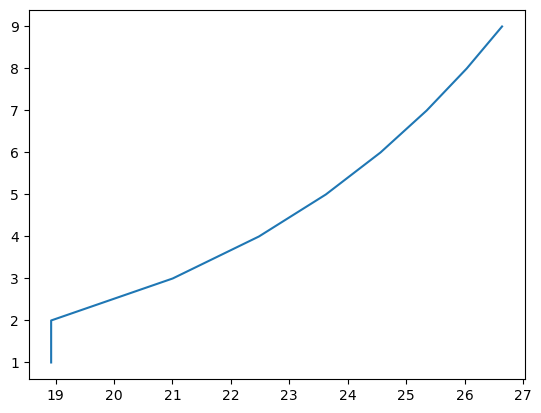

In [88]:
plt.plot(results,z_values)

In [39]:
display(db)

{'v_b0': 27,
 'c_season': 1,
 'c_0': 1,
 'c_dir': 1,
 'K': 0.2,
 'n': 0.5,
 'p': 0.7,
 'z_0II': 0.05,
 'z_max': 200,
 'z_0': 0.05,
 'z_min': 2,
 'v_b': 27,
 'c_prob': 0.735406695578229,
 'k_r': 0.190000000000000,
 'sigma_v': 5.13*k_I,
 'c_r': Piecewise((0.19*log(20.0*z), (z >= 2) & (z <= 200)), (0.700887096281648, z <= 2))}

In [67]:
db['v_b']

27